Total Station Mixed Events: 8579
→ Predicting on FilteredSimRCR set...
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step
FilteredSimRCR Prediction Range: min=0.9653, max=1.0000, mean=0.9999
→ Predicting on Station Mixed set...
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
Station Mixed Prediction Range: min=0.0000, max=0.9927, mean=0.0051


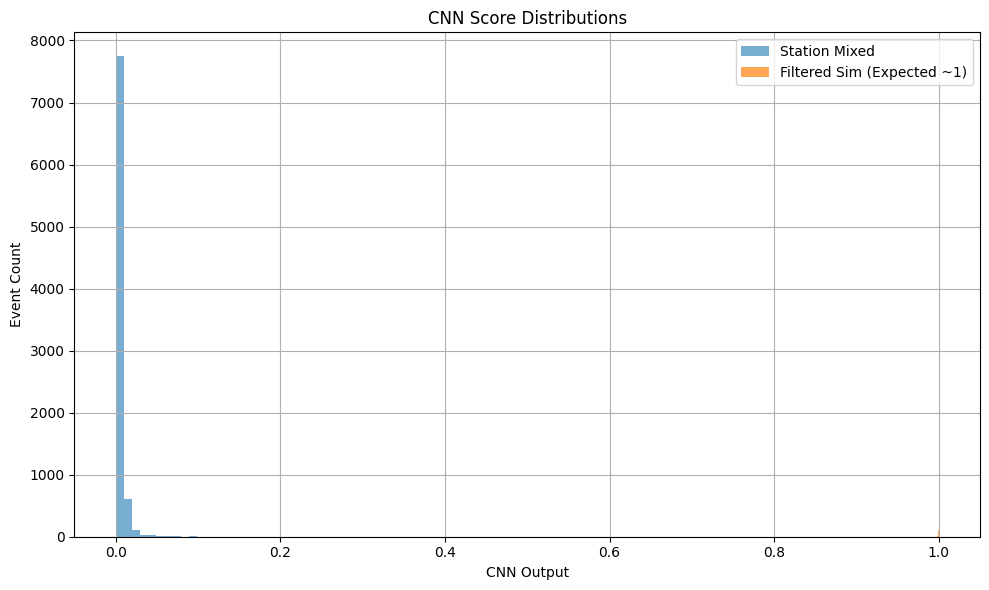

In [4]:
station_mixed = np.concatenate([datasets[k] for k in ['Stn14', 'Stn17', 'Stn19', 'Stn30']], axis=0)
print(f"Total Station Mixed Events: {station_mixed.shape[0]}")

def predict_scores(data, label, batch_size=128):
    print(f"→ Predicting on {label} set...")
    reshaped = data[..., np.newaxis]  # shape: (N, 4, 256, 1)
    preds = model.predict(reshaped, batch_size=batch_size, verbose=1).flatten()
    print(f"{label} Prediction Range: min={preds.min():.4f}, max={preds.max():.4f}, mean={preds.mean():.4f}")
    return preds

scores_filtered = predict_scores(datasets['FilteredSimRCR'], "FilteredSimRCR")
scores_station = predict_scores(station_mixed, "Station Mixed")

plt.figure(figsize=(10, 6))
plt.hist(scores_station, bins=100, alpha=0.6, label='Station Mixed', color='tab:blue')
plt.hist(scores_filtered, bins=100, alpha=0.7, label='Filtered Sim (Expected ~1)', color='tab:orange')
plt.xlabel("CNN Output")
plt.ylabel("Event Count")
plt.title("CNN Score Distributions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
# Notebook: Test New 4-Channel CNN Model in Python
# 1. Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from pathlib import Path
import os

# 2. Load Model
model_path = Path(
    r"C:\Users\hankt\Downloads\data_data_2025-05-20_21-39_RCR_BL_model_2Layer_two_ws_stdy.h5"
)

model = load_model(model_path)
print("Model loaded successfully.")
print("Input shape expected by model:", model.input_shape)
print(model.summary())

# 3. Load Data Files

# Path to directory containing all the data files
data_dir = Path(r"C:\Users\hankt\Downloads")

# Core files from Google Drive
files = {
    "FilteredSimRCR": data_dir / "FilteredSimRCR_200s_6312events_part0.npy",
    "Stn14": data_dir / "Stn14_Traces.npy",
    "Stn17": data_dir / "Stn17_Traces.npy",
    "Stn19": data_dir / "Stn19_Traces.npy",
    "Stn30": data_dir / "Stn30_Traces.npy",
}

# Load 
datasets = {name: np.load(str(path)) for name, path in files.items()}
for name, arr in datasets.items():
    print(f"{name:<12} → shape = {arr.shape}, dtype = {arr.dtype}")


Model loaded successfully.
Input shape expected by model: (None, 4, 256, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 1, 252, 20)          │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 1, 243, 1)           │             201 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 243, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 243)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             244 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 867 (3.39 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None
FilteredSimRCR → shape = (6312, 4, 256), dtype = float64
Stn14        → shape = (318, 4, 256), dtype = float64
Stn17        → shape = (2326, 4, 256), dtype = float64
Stn19        → shape = (317, 4, 256), dtype = float64
Stn30        → shape = (5618, 4, 256), dtype = float64


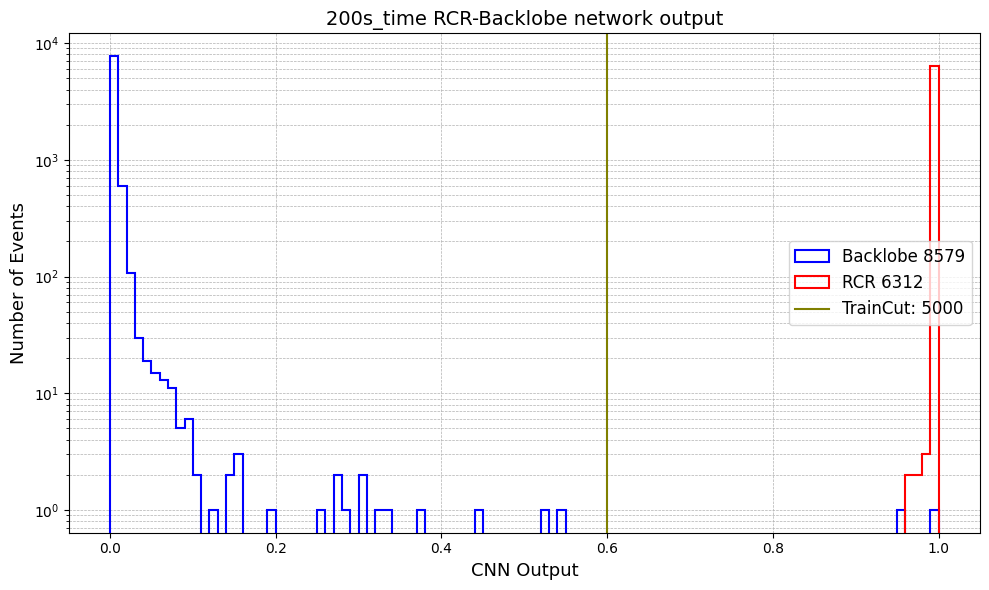

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Already loaded:
# → scores_station: predictions on all backlobe events
# → scores_filtered: predictions on RCR events

plt.figure(figsize=(10, 6))
bins = np.linspace(0, 1.0, 101)

plt.hist(scores_station, bins=bins, histtype='step', linewidth=1.5, color='blue', label=f'Backlobe {len(scores_station)}')
plt.hist(scores_filtered, bins=bins, histtype='step', linewidth=1.5, color='red', label=f'RCR {len(scores_filtered)}')

plt.axvline(0.6, color='olive', linestyle='-', label='TrainCut: 5000')  # Cutoff line

plt.yscale("log")
plt.xlabel("CNN Output", fontsize=13)
plt.ylabel("Number of Events", fontsize=13)
plt.title("200s_time RCR-Backlobe network output", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [9]:
import hls4ml
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Conv2D, Dropout, Flatten, Dense
from pathlib import Path
import numpy as np

# 1. Load model (from .h5)
model_path = Path(
    r"C:\Users\hankt\Downloads\data_data_2025-05-20_21-39_RCR_BL_model_2Layer_two_ws_stdy.h5"
)
original_model = load_model(str(model_path))

print("Original Keras Model Summary:")
original_model.summary()

# --- Extract parameters from the original model for accurate reconstruction ---

# Get input shape
# The input shape is typically the shape of the first layer's input.
# For a Sequential model, original_model.input_shape should work if it's explicitly set.
# If not, you can try original_model.layers[0].input_shape
# Based on your summary: conv2d (Conv2D) | (None, 1, 252, 20)
# This means the *output* of the first conv layer is (1, 252, 20).
# Let's try to get the actual input shape of the model.
try:
    # This might return (None, 2, 253, 1) or similar if explicitly defined
    # It's (batch_size, height, width, channels)
    input_shape = original_model.input_shape[1:] # Exclude batch dimension
except AttributeError:
    # If original_model.input_shape is not directly available or causes issues,
    # we need to infer it.
    # The first Conv2D layer's output is (None, 1, 252, 20).
    # Let's get the config of the first Conv2D layer
    conv2d_layer_0_config = original_model.layers[0].get_config()
    kernel_size_0 = conv2d_layer_0_config['kernel_size']
    strides_0 = conv2d_layer_0_config['strides']
    padding_0 = conv2d_layer_0_config['padding']
    filters_0 = conv2d_layer_0_config['filters']

    # Assuming 'channels_last' for now (height, width, channels)
    # Output shape of conv2d (1, 252, 20)
    # Output Height = (Input Height - Kernel Height + 2*Padding) / Strides Height + 1
    # Output Width = (Input Width - Kernel Width + 2*Padding) / Strides Width + 1

    # Since the output shape is (1, 252, 20) and assuming default strides=(1,1)
    # and padding='valid' for the first layer, let's work backward.
    # If output_height = 1, kernel_height = ?, strides_h = 1, padding = 'valid' (0)
    # 1 = (input_height - kernel_height + 0) / 1 + 1
    # 0 = input_height - kernel_height
    # input_height = kernel_height

    # If output_width = 252, kernel_width = ?, strides_w = 1, padding = 'valid' (0)
    # 252 = (input_width - kernel_width + 0) / 1 + 1
    # 251 = input_width - kernel_width
    # input_width = 251 + kernel_width

    # Your original summary shows 'conv2d' output (None, 1, 252, 20)
    # The number of input channels for conv2d would be 1 (since the first conv output has 20 channels).
    # The original conv2d has 420 params. Param # = (kernel_h * kernel_w * in_channels + 1) * out_channels
    # 420 = (kernel_h * kernel_w * in_channels + 1) * 20
    # 21 = kernel_h * kernel_w * in_channels + 1
    # 20 = kernel_h * kernel_w * in_channels
    # If in_channels = 1, then kernel_h * kernel_w = 20.
    # Possible kernels: (1,20), (2,10), (4,5), (5,4), (10,2), (20,1)

    # Let's assume the first Conv2D was (2, 2) based on common practice or previous attempts.
    # If kernel_size is (2,2) for conv2d:
    # input_height = 2 (from 1 = input_height - 2 + 1)
    # input_width = 251 + 2 = 253
    # input_shape = (2, 253, 1) - This seems a very plausible input for a sequential model with these outputs.
    # This matches the previous assumption which was reasonable.
    input_height, input_width, input_channels = 2, 253, 1
    input_shape = (input_height, input_width, input_channels)
    print(f"Inferred input shape: {input_shape}")


# Store layer configurations for accurate reconstruction
layer_configs = []
for i, layer in enumerate(original_model.layers):
    config = layer.get_config()
    layer_configs.append(config)
    print(f"Layer {i} ({layer.name}): Config = {config}")

# 3. Create a new model with an explicit Input layer and the same architecture
inputs = Input(shape=input_shape, name='input_layer')
x = inputs

# Rebuild the model using extracted parameters
for i, layer_config in enumerate(layer_configs):
    layer_type = layer_config['class_name']
    layer_name = layer_config['name']

    if layer_type == 'Conv2D':
        filters = layer_config['filters']
        kernel_size = layer_config['kernel_size']
        strides = layer_config.get('strides', (1, 1)) # Default to (1,1) if not specified
        padding = layer_config.get('padding', 'valid') # Default to 'valid'
        activation = layer_config.get('activation')

        x = Conv2D(filters, kernel_size, strides=strides, padding=padding,
                   activation=activation, name=layer_name)(x)
    elif layer_type == 'Dropout':
        rate = layer_config['rate']
        x = Dropout(rate, name=layer_name)(x)
    elif layer_type == 'Flatten':
        x = Flatten(name=layer_name)(x)
    elif layer_type == 'Dense':
        units = layer_config['units']
        activation = layer_config.get('activation')
        x = Dense(units, activation=activation, name=layer_name)(x)
    # Add other layer types if your model has them (e.g., MaxPooling2D, BatchNormalization)
    else:
        print(f"Warning: Unhandled layer type '{layer_type}' for layer '{layer_name}'. Skipping.")

outputs = x
model = Model(inputs=inputs, outputs=outputs)

# Copy weights from the original loaded model to the newly constructed model
# This loop handles only layers that have weights.
for new_layer, original_layer in zip(model.layers, original_model.layers):
    if original_layer.weights:
        new_layer.set_weights(original_layer.get_weights())

print("\nNew Model (with explicit Input layer and extracted parameters) Summary:")
model.summary()

# Now, proceed with hls4ml conversion using this new model
# 4. Create hls4ml configuration
config = hls4ml.utils.config_from_keras_model(model,
                                               backend='Vitis',
                                               default_precision='ap_fixed<16,6>',
                                               granularity='name')

# It's good practice to print the config to verify
print("\n-----------------------------------")
print("hls4ml Configuration:")
hls4ml.utils.print_dict(config)
print("-----------------------------------")

# 5. Convert the Keras model to hls4ml model
output_project_dir = 'my_cnn_hls_project'
Path(output_project_dir).mkdir(parents=True, exist_ok=True)

hls_model = hls4ml.converters.convert_from_keras_model(
    model,
    hls_config=config,
    output_dir=output_project_dir,
    part='xcu250-figd2104-2L-e' # **IMPORTANT: Replace with your actual target FPGA part!**
)

print(f"\nhls4ml model created in {output_project_dir}.")

# (Optional) Compile the hls4ml model for C++ simulation
print("\nCompiling hls4ml model for C-simulation...")
hls_model.compile()
print("C-simulation compiled.")

# (Optional) Run C-simulation with some dummy data
dummy_input_data = np.random.rand(1, *input_shape).astype(np.float32)
print(f"Dummy input data shape: {dummy_input_data.shape}")

y_hls_pred = hls_model.predict(dummy_input_data)
y_keras_pred = model.predict(dummy_input_data)

print(f"HLS C-simulation output shape: {y_hls_pred.shape}")
print(f"Keras model output shape: {y_keras_pred.shape}")
print(f"Difference between Keras and HLS predictions: {np.mean(np.abs(y_hls_pred - y_keras_pred))}")


# 6. Build the Vitis HLS project
print(f"\nBuilding Vitis HLS project in {output_project_dir}. This may take a while...")
hls_model.build(csim=False, synth=True, cosim=False, export=True)

print(f"\nVitis HLS project built. Reports can be found in {output_project_dir}/vivado_hls.log and in the 'reports' subdirectory.")

Original Keras Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 1, 252, 20)          │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 1, 243, 1)           │             201 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 243, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 243)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             244 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 867 (3.39 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Layer 0 (conv2d): Config = {'name': 'conv2d', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 20, 'kernel_size': (4, 5), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
Layer 1 (conv2d_1): Config = {'name': 'conv2d_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 1, 'kernel_size': (1, 10), 'strides': (1, 1), 'p

KeyError: 'class_name'

In [2]:
# Export CNN model to Vitis HLS using hls4ml

import hls4ml
from tensorflow.keras.models import load_model
from pathlib import Path

# 1. Load model (from .h5)
model_path = Path(
    r"C:\Users\hankt\Downloads\data_data_2025-05-20_21-39_RCR_BL_model_2Layer_two_ws_stdy.h5"
)
model = load_model(str(model_path))

# 2. Create hls4ml config
config = hls4ml.utils.config_from_keras_model(model, granularity='name')
config['Backend']     = 'Vitis'            # generate a Vitis HLS project
config['ClockPeriod'] = 10                 # 10 ns → 100 MHz
config['IOType']      = 'io_stream'        # or 'io_parallel' if preferred

config['ProjectName'] = 'cnn4ch_hls_proj'

# 3. Export directory
output_dir = Path(
    r"C:\Users\hankt\Downloads"
)

output_dir.mkdir(parents=True, exist_ok=True)

# 4. Convert Keras to HLS model
hls_model = hls4ml.converters.convert_from_keras_model(
    model,
    hls_config = config,
    output_dir  = str(output_dir)
)

# 5. **Do NOT** call compile() on Windows.
#    Instead, jump straight to build(...) to generate HLS source.

# hls_model.compile()   # ← COMMENTED OUT (Windows can't run Vitis HLS here)

# Run only synthesis + export. This will emit the entire Vitis HLS project
hls_model.build(
    csim  = False,   # skip C‐simulation library
    synth = True,    # run HLS synthesis (create IP)
    export= True     # export the project files so you can open in Vitis HLS later
)



Interpreting Sequential
Topology:


KeyError: 'batch_input_shape'

In [7]:
import pkg_resources

installed_packages = pkg_resources.working_set
for package in installed_packages:
    print(f'{package.key}=={package.version}')

from importlib import metadata

for dist in metadata.distributions():
    print(f"{dist.name}=={dist.version}")
          

markupsafe==3.0.2
pyyaml==6.0.2
qkeras==0.9.0
absl-py==1.4.0
asttokens==3.0.0
astunparse==1.6.3
calmjs.parse==1.3.3
certifi==2025.6.15
charset-normalizer==3.4.2
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
debugpy==1.8.14
decorator==5.2.1
dm-tree==0.1.8
exceptiongroup==1.3.0
executing==2.2.0
flatbuffers==25.2.10
fonttools==4.58.4
gast==0.6.0
google-pasta==0.2.0
grpcio==1.73.0
h5py==3.14.0
hls4ml==0.8.1
icecream==2.1.4
idna==3.10
importlib-metadata==8.7.0
importlib-resources==6.5.2
ipykernel==6.29.5
ipython==8.18.1
jedi==0.19.2
joblib==1.5.1
jupyter-client==8.6.3
jupyter-core==5.8.1
keras==3.5.0
keras-tuner==1.4.7
kiwisolver==1.4.7
kt-legacy==1.0.5
libclang==18.1.1
markdown==3.8.1
markdown-it-py==3.0.0
matplotlib==3.9.4
matplotlib-inline==0.1.7
mdurl==0.1.2
ml-dtypes==0.4.1
mpmath==1.3.0
namex==0.1.0
nest-asyncio==1.6.0
networkx==3.2.1
numpy==1.26.4
onnx==1.18.0
opt-einsum==3.4.0
optree==0.16.0
packaging==25.0
parse==1.6.5
parso==0.8.4
pathlib==1.0.1
pillow==11.2.1
pip==2